In [2]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from mpl_toolkits.mplot3d import *
from random import random, seed
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from string import ascii_lowercase
from sklearn.cluster import MeanShift
import collections

In [3]:
df = pd.read_csv('sub_new_data2.csv')

In [4]:
df.head()

,user_name,daily_profit,daily_income,expenses,coeff,p_value,Labels
0,00415952-3309-4e6b-af4b-b1c02dc2d08b+Sales,82.057523,6220.606970,6138.549447,-0.731327,0.851442,M
1,009f7f82-f9be-470a-8df0-1e2043829cd5+Coffee Sales,9.651116,16712.679583,16703.028467,-20.082338,0.069878,G
2,009f7f82-f9be-470a-8df0-1e2043829cd5+Food Sales,7.909785,17785.715417,17777.805631,-26.526618,0.098223,G
3,009f7f82-f9be-470a-8df0-1e2043829cd5+Other Income,52.159368,4478.290000,4426.130632,4.053917,0.270635,G
4,009f7f82-f9be-470a-8df0-1e2043829cd5+Soft Beve...,0.963863,3245.362083,3244.398221,-3.725343,0.197756,G


In [5]:
df.shape

(2892, 7)

In [6]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,daily_profit,daily_income,expenses,coeff,p_value
daily_profit,1,0.637997,0.629861,-0.186376,-0.00724593
daily_income,0.637997,1,0.999945,-0.212663,-0.0684389
expenses,0.629861,0.999945,1,-0.211959,-0.0689326
coeff,-0.186376,-0.212663,-0.211959,1,0.0438402
p_value,-0.00724593,-0.0684389,-0.0689326,0.0438402,1


In [7]:
df = df.drop(["expenses"], axis=1)

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,daily_profit,daily_income,coeff,p_value
daily_profit,1,0.637997,-0.186376,-0.00724593
daily_income,0.637997,1,-0.212663,-0.0684389
coeff,-0.186376,-0.212663,1,0.0438402
p_value,-0.00724593,-0.0684389,0.0438402,1


In [9]:
df = df.drop(["user_name", "p_value"], axis =1)

In [10]:
df.head()

,daily_profit,daily_income,coeff,Labels
0,82.057523,6220.606970,-0.731327,M
1,9.651116,16712.679583,-20.082338,G
2,7.909785,17785.715417,-26.526618,G
3,52.159368,4478.290000,4.053917,G
4,0.963863,3245.362083,-3.725343,G


In [11]:
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)

In [12]:
labels = df['Labels'].unique().tolist()

In [13]:
alphab = []
daily_profit = []
daily_revenue = []
coeff = []
for label in labels:
    alphab.append(label)
    daily_profit.append(df.loc[(df['Labels'] == label)].mean()[0])
    daily_revenue.append(df.loc[(df['Labels'] == label)].mean()[1])
    coeff.append(df.loc[(df['Labels'] == label)].mean()[2])
    print("The label is", label)
    print(df.loc[(df['Labels'] == label)].mean())

The label is M
daily_profit      190.682993
daily_income    33747.444898
coeff             -54.310661
dtype: float64
The label is G
daily_profit      247.810063
daily_income    25941.812767
coeff             -70.900568
dtype: float64
The label is Q
daily_profit      327.382766
daily_income    22709.996949
coeff             -27.136665
dtype: float64
The label is I
daily_profit      361.828109
daily_income    29624.829429
coeff              -6.995932
dtype: float64
The label is A
daily_profit      564.716692
daily_income    49365.623428
coeff             -25.531566
dtype: float64
The label is H
daily_profit      173.736203
daily_income    21805.944529
coeff            -107.816313
dtype: float64
The label is L
daily_profit      489.386856
daily_income    40319.714714
coeff             -36.627059
dtype: float64
The label is C
daily_profit      264.689358
daily_income    25855.870941
coeff            -111.714774
dtype: float64
The label is R
daily_profit      660.243082
daily_income    4882

<IPython.core.display.Javascript object>


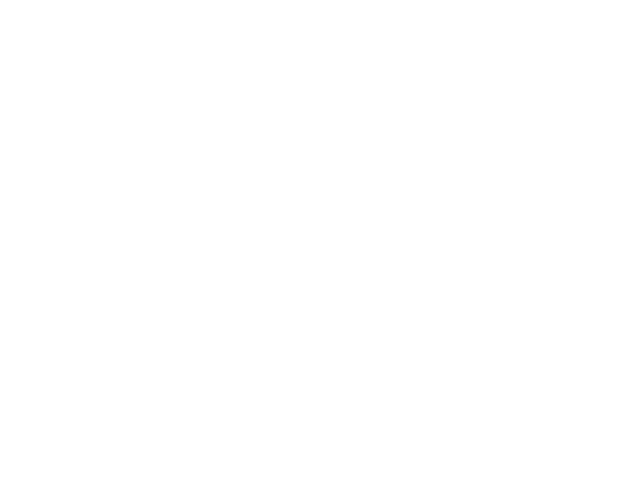

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, daily_profit, width, color='r')
plt.show()

<IPython.core.display.Javascript object>


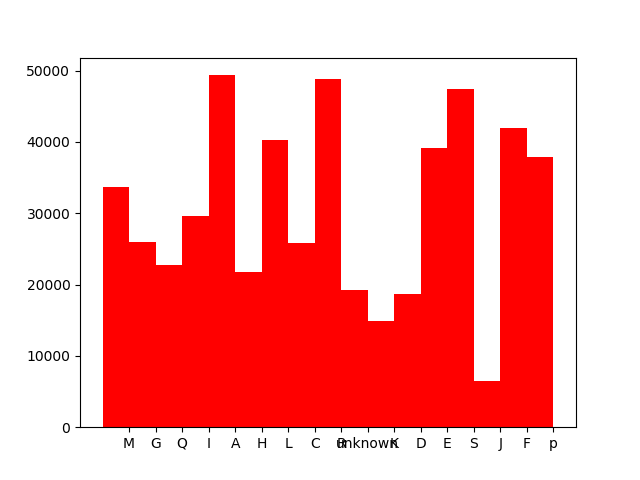

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, daily_revenue, width, color='r')
plt.show()

<IPython.core.display.Javascript object>


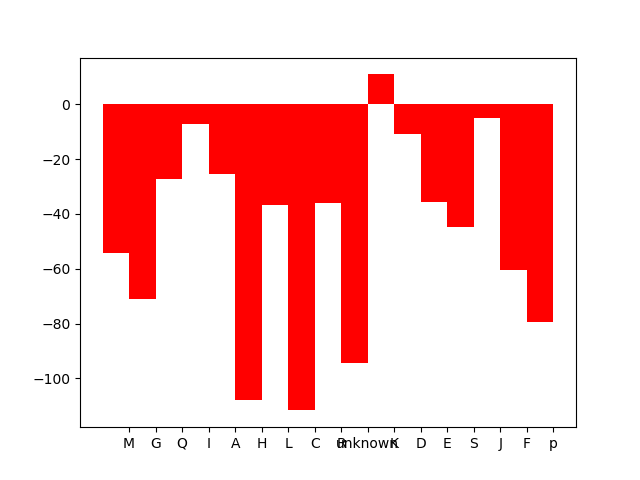

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, coeff, width, color='r')
plt.show()

<IPython.core.display.Javascript object>


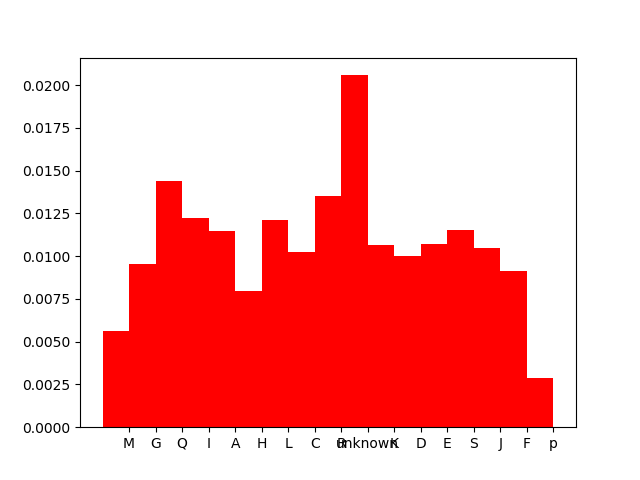

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, np.array(daily_profit)/np.array(daily_revenue), width, color='r')
plt.show()

<IPython.core.display.Javascript object>


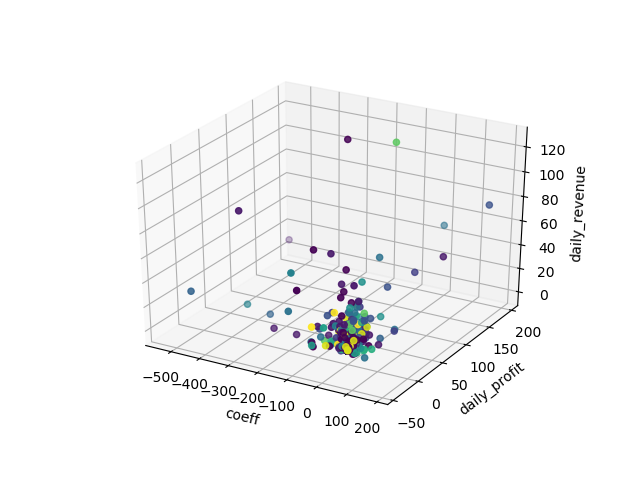

In [18]:
%matplotlib notebook
df1 = df.drop(["Labels"], axis=1)
sd = StandardScaler()
sd1 = RobustScaler()
df1 = sd.fit_transform(df1)
df1 = sd1.fit_transform(df1)
df1 = pd.DataFrame(df1)
df1.columns = ['new_profit','new_income', 'coeff']
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d


x = df1["coeff"]
y = df1["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
z = df1["new_income"] # mean of the daily income / total number of days
ax.scatter(x, y, z, c=pd.factorize( df['Labels'].to_numpy() )[0], marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('daily_profit')
ax.set_zlabel('daily_revenue')

plt.show()

The label is M


<IPython.core.display.Javascript object>


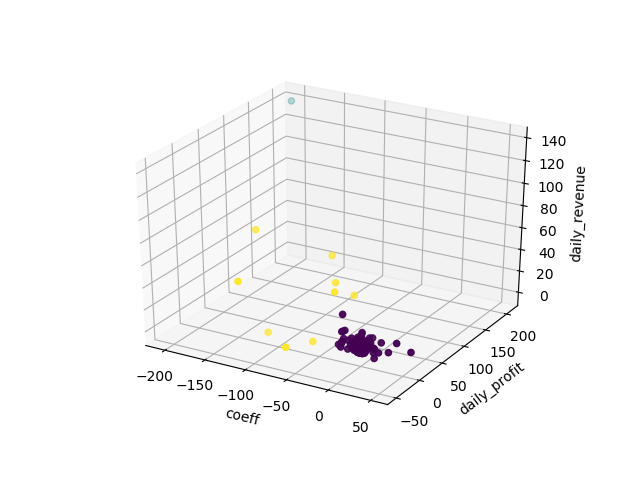

Counter({0: 474, 2: 9, 1: 1})
new_profit    1.144272
new_income    0.977458
coeff        -0.781411
0             0.000000
dtype: float64
new_profit    208.428902
new_income    138.783165
coeff        -205.686448
0               1.000000
dtype: float64
new_profit    15.473400
new_income    33.794171
coeff        -79.956718
0              2.000000
dtype: float64
The label is G


<IPython.core.display.Javascript object>


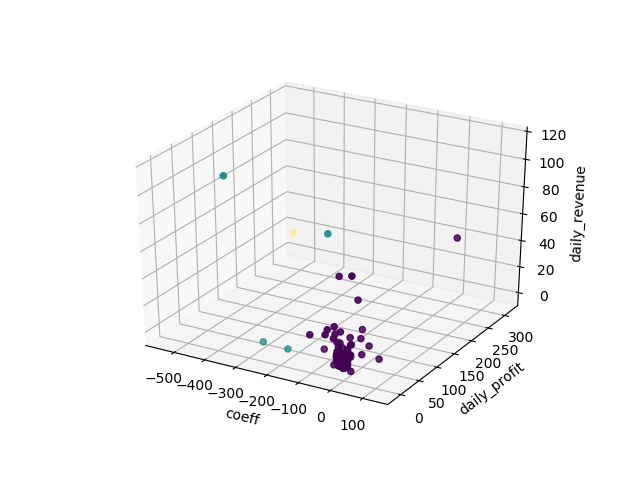

Counter({0: 721, 1: 4, 2: 1})
new_profit    1.895216
new_income    1.376373
coeff        -1.678792
0             0.000000
dtype: float64
new_profit     26.333510
new_income     49.086594
coeff        -243.174808
0               1.000000
dtype: float64
new_profit    316.624768
new_income     14.347741
coeff        -545.130802
0               2.000000
dtype: float64
The label is Q


<IPython.core.display.Javascript object>


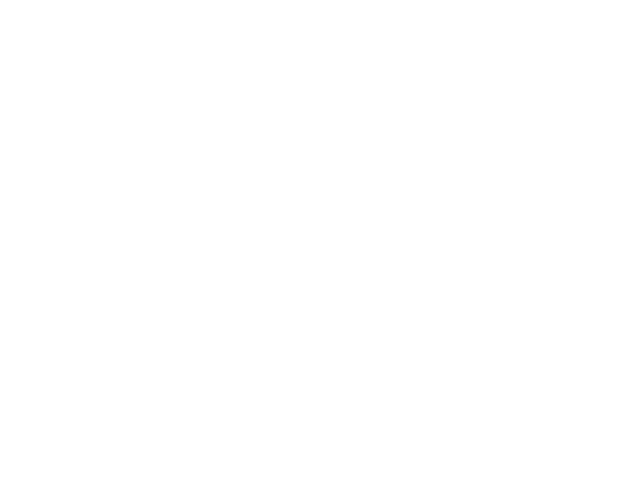

Counter({0: 125, 2: 10, 1: 1})
new_profit    0.523847
new_income    0.252931
coeff        -0.054694
0             0.000000
dtype: float64
new_profit    26.202598
new_income    10.653528
coeff        -35.165273
0              1.000000
dtype: float64
new_profit    7.042237
new_income    6.549286
coeff        -6.210616
0             2.000000
dtype: float64
The label is I


<IPython.core.display.Javascript object>


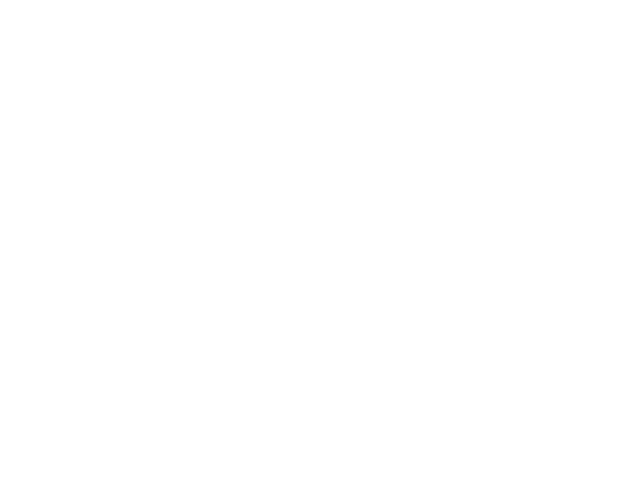

Counter({0: 199, 1: 4, 2: 2})
new_profit    0.708135
new_income    0.933788
coeff        -0.680823
0             0.000000
dtype: float64
new_profit     4.868682
new_income    14.680051
coeff        -71.162637
0              1.000000
dtype: float64
new_profit     37.895874
new_income     27.114571
coeff         148.641890
0               2.000000
dtype: float64
The label is A


<IPython.core.display.Javascript object>


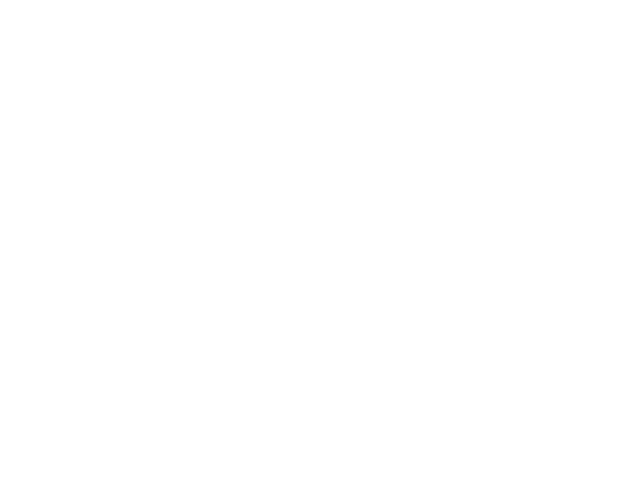

Counter({0: 200, 2: 5, 1: 1})
new_profit    1.183763
new_income    0.927878
coeff        -0.500203
0             0.000000
dtype: float64
new_profit     93.327637
new_income     44.654420
coeff         106.441626
0               1.000000
dtype: float64
new_profit     3.933403
new_income     8.898024
coeff        -32.083774
0              2.000000
dtype: float64
The label is H


<IPython.core.display.Javascript object>


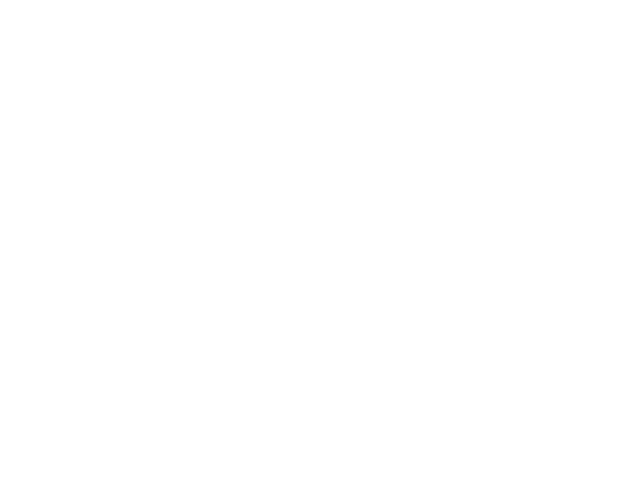

Counter({0: 143, 2: 1, 1: 1})
new_profit    0.966088
new_income    0.580807
coeff        -0.309245
0             0.000000
dtype: float64
new_profit     28.507534
new_income      2.507115
coeff        -289.654292
0               1.000000
dtype: float64
new_profit    -39.775207
new_income     31.861088
coeff        -410.263193
0               2.000000
dtype: float64
The label is L


<IPython.core.display.Javascript object>


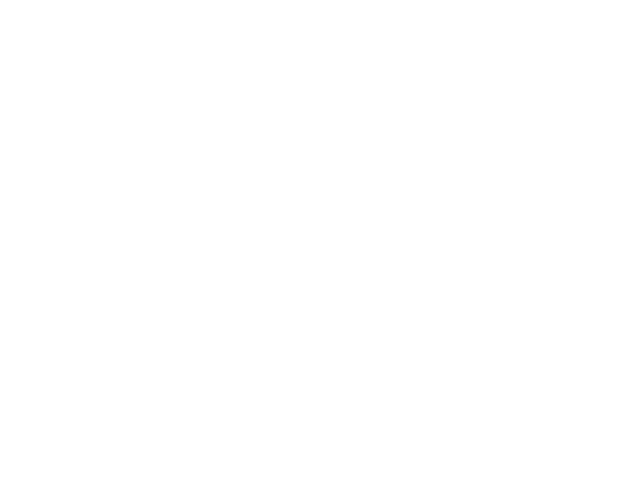

Counter({0: 260, 2: 15, 1: 3})
new_profit    0.914476
new_income    0.570239
coeff         0.755004
0             0.000000
dtype: float64
new_profit     -9.359547
new_income     10.206964
coeff        -129.934080
0               1.000000
dtype: float64
new_profit    13.967725
new_income    11.147251
coeff        -29.408352
0              2.000000
dtype: float64
The label is C


<IPython.core.display.Javascript object>


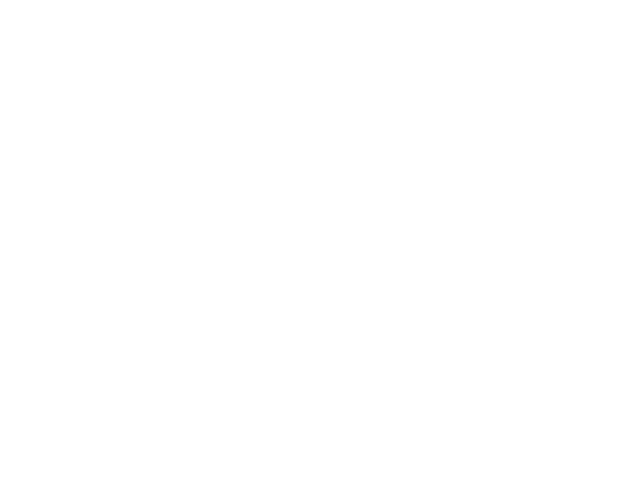

Counter({0: 140, 2: 1, 1: 1})
new_profit    1.665997
new_income    1.066943
coeff        -2.146061
0             0.000000
dtype: float64
new_profit     39.595662
new_income      6.427207
coeff        -442.929783
0               1.000000
dtype: float64
new_profit    -20.537017
new_income     71.449937
coeff        -171.274414
0               2.000000
dtype: float64
The label is R


<IPython.core.display.Javascript object>


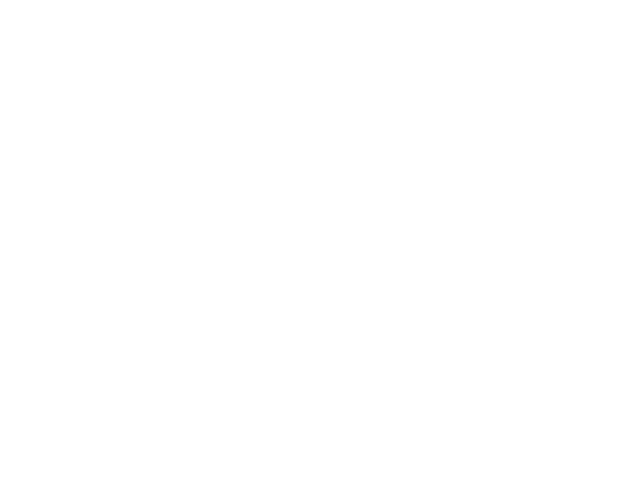

Counter({0: 42, 1: 2, 2: 1})
new_profit    0.215305
new_income    0.280785
coeff        -0.222695
0             0.000000
dtype: float64
new_profit    18.120855
new_income    20.460831
coeff        -18.001908
0              1.000000
dtype: float64
new_profit    29.927990
new_income     6.567093
coeff          4.526648
0              2.000000
dtype: float64
The label is unknown


<IPython.core.display.Javascript object>


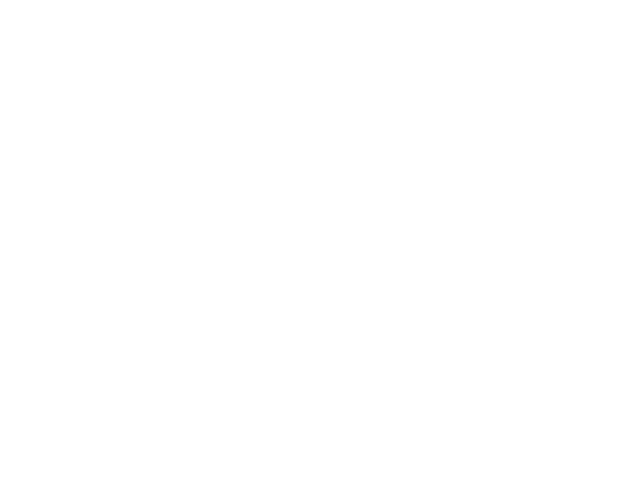

Counter({0: 51, 1: 2, 2: 2})
new_profit    1.160078
new_income    0.619518
coeff         0.694285
0             0.000000
dtype: float64
new_profit     43.915914
new_income      0.930440
coeff        -207.021815
0               1.000000
dtype: float64
new_profit    22.350714
new_income    19.357904
coeff        -87.662146
0              2.000000
dtype: float64
The label is K


<IPython.core.display.Javascript object>


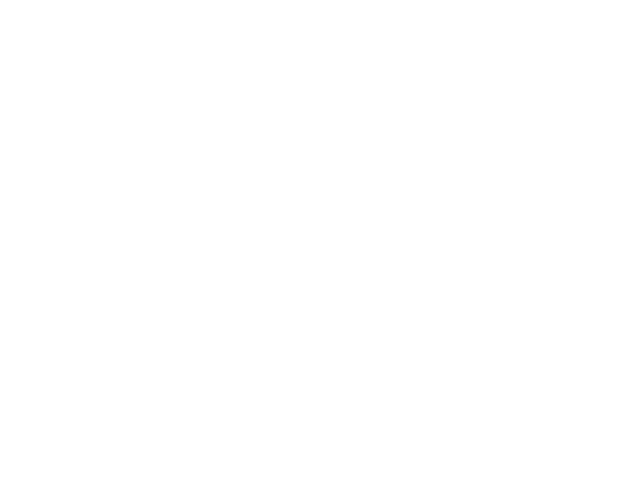

Counter({0: 133, 2: 5, 1: 4})
new_profit    0.609178
new_income    0.580498
coeff        -0.005930
0             0.000000
dtype: float64
new_profit     6.684358
new_income     1.909018
coeff         90.065986
0              1.000000
dtype: float64
new_profit     9.105107
new_income    24.679088
coeff        -36.917728
0              2.000000
dtype: float64
The label is D
Too less sample for clustering
The label is E


<IPython.core.display.Javascript object>


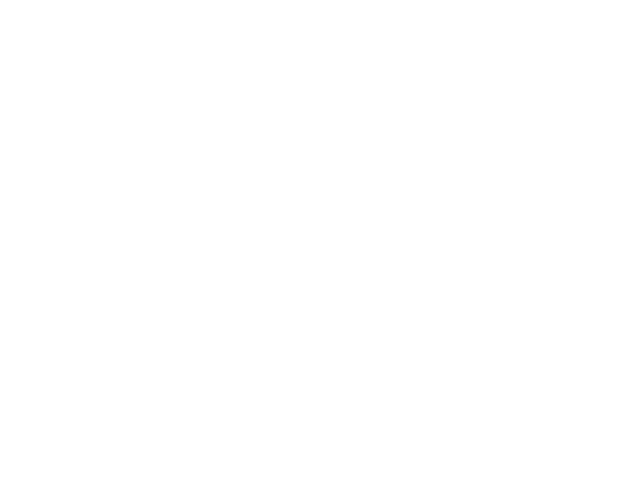

Counter({0: 142, 1: 2, 2: 1})
new_profit    1.724557
new_income    1.374342
coeff        -1.310617
0             0.000000
dtype: float64
new_profit      4.617834
new_income     10.113801
coeff        -149.607214
0               1.000000
dtype: float64
new_profit    177.534771
new_income    160.714957
coeff        -232.399750
0               2.000000
dtype: float64
The label is S


<IPython.core.display.Javascript object>


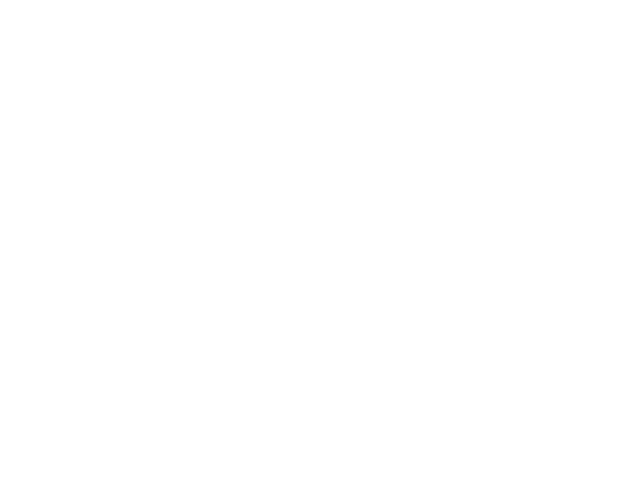

Counter({0: 13, 2: 1, 1: 1})
new_profit    0.304407
new_income    0.102006
coeff         0.035153
0             0.000000
dtype: float64
new_profit    16.178690
new_income    18.355549
coeff        -15.015084
0              1.000000
dtype: float64
new_profit   -1.159397
new_income    0.622070
coeff        -5.265046
0             2.000000
dtype: float64
The label is J


<IPython.core.display.Javascript object>


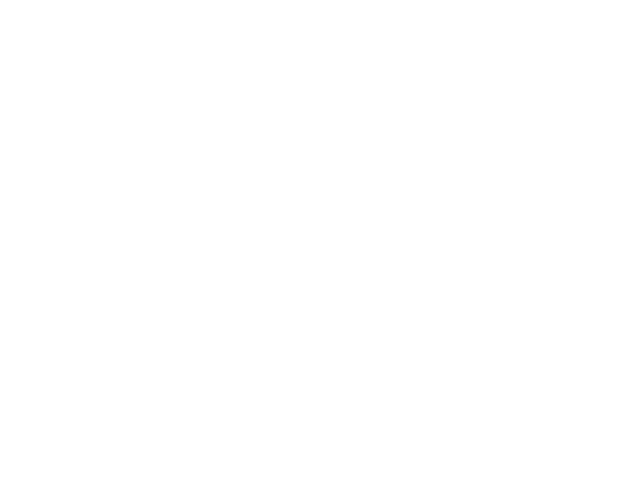

Counter({0: 13, 1: 3, 2: 1})
new_profit   -0.016441
new_income   -0.041536
coeff        -0.053871
0             0.000000
dtype: float64
new_profit    5.521041
new_income    8.556909
coeff        -2.828051
0             1.000000
dtype: float64
new_profit    2.728603
new_income    4.609590
coeff        -0.914435
0             2.000000
dtype: float64
The label is F


<IPython.core.display.Javascript object>


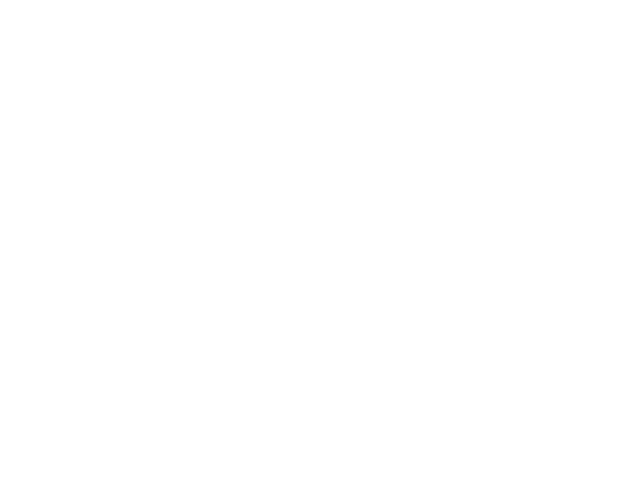

Counter({0: 75, 1: 7, 2: 2})
new_profit    0.486708
new_income    0.247290
coeff        -0.408532
0             0.000000
dtype: float64
new_profit     2.658460
new_income     3.838564
coeff        -13.307645
0              1.000000
dtype: float64
new_profit    10.692265
new_income     3.193431
coeff          5.736565
0              2.000000
dtype: float64
The label is p


<IPython.core.display.Javascript object>


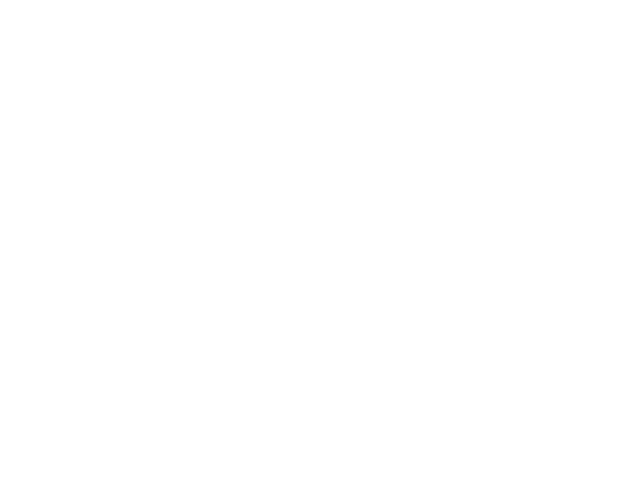

Counter({0: 54, 2: 6, 1: 1})
new_profit   -0.075922
new_income    0.218441
coeff        -0.637777
0             0.000000
dtype: float64
new_profit   -34.887978
new_income    11.116277
coeff        -41.752329
0              1.000000
dtype: float64
new_profit    17.111916
new_income     5.825757
coeff         -7.304823
0              2.000000
dtype: float64


In [19]:
%matplotlib notebook
for element in labels:
    print("The label is", element)
    part = df[df['Labels']==element].drop(["Labels"], axis=1)
    if (part.shape[0] < 10):
        print("Too less sample for clustering")
    #print(part.head())
    else:
        sd = StandardScaler()
        sd1 = RobustScaler()
        part = sd.fit_transform(part)
        part = sd1.fit_transform(part)
        part = pd.DataFrame(part)
        part.columns = ['new_profit','new_income', 'coeff']
        kmeans_model = KMeans(n_clusters=3, random_state=1).fit(part)
        labels = kmeans_model.predict(part)
        k_means = labels
        fig = plt.figure()
        ax = fig.gca(projection='3d')               # to work in 3d


        x = part["coeff"]
        y = part["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
        z = part["new_income"] # mean of the daily income / total number of days
        ax.scatter(x, y, z, c=labels, marker='o')

        ax.set_xlabel('coeff')
        ax.set_ylabel('daily_profit')
        ax.set_zlabel('daily_revenue')
        counter=collections.Counter(k_means)
        print(counter)
        part = pd.concat([part, pd.DataFrame(k_means)], axis=1, sort=False)
        print(part.loc[(part[0] == 0)].mean())
        print(part.loc[(part[0] == 1)].mean())
        print(part.loc[(part[0] == 2)].mean())
        plt.show()

The label is M


<IPython.core.display.Javascript object>


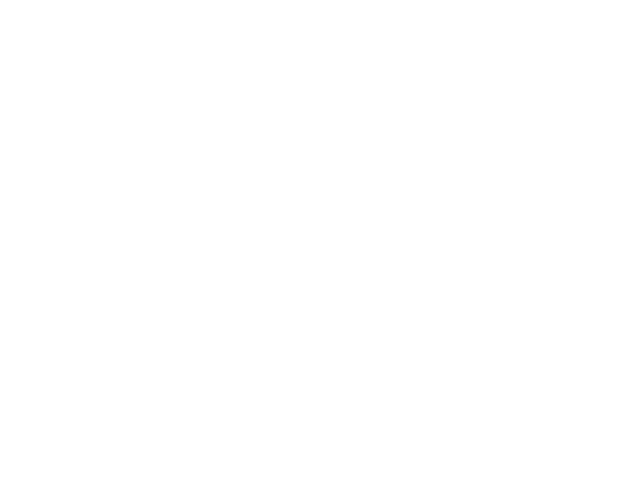

The label is G


<IPython.core.display.Javascript object>


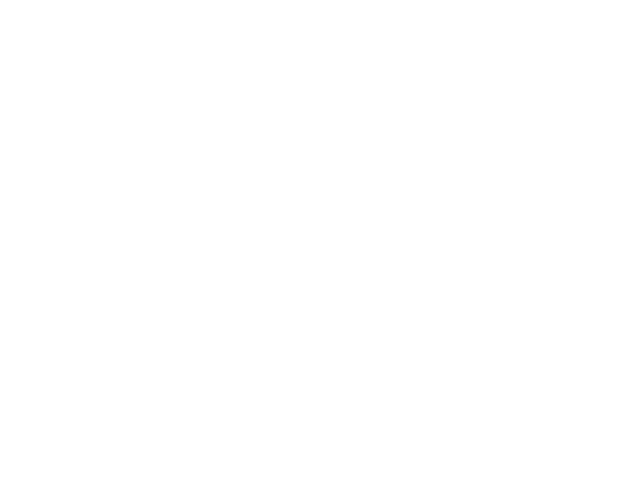

The label is Q


<IPython.core.display.Javascript object>


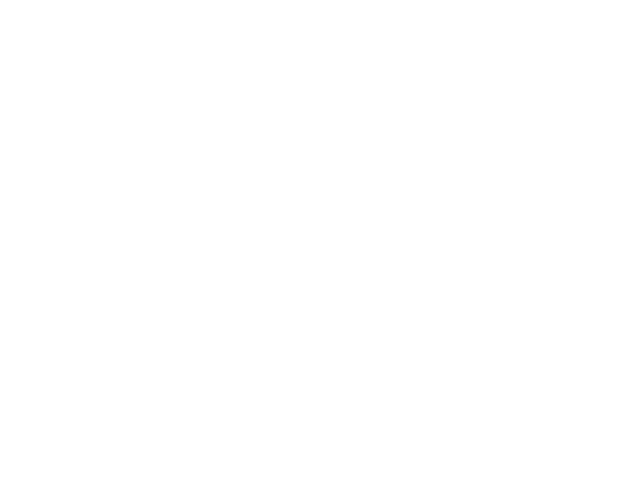

The label is I


<IPython.core.display.Javascript object>


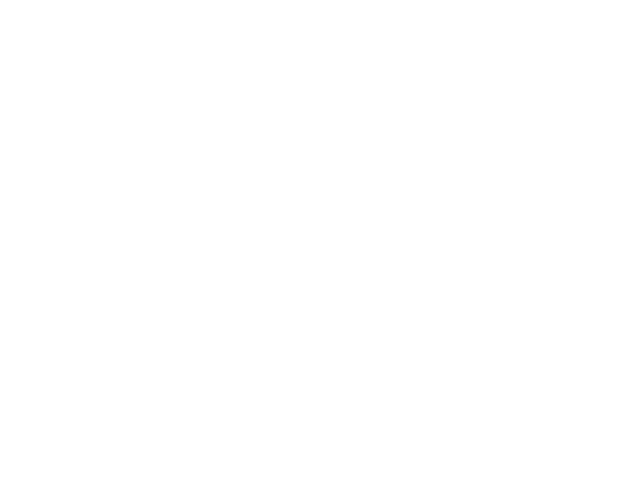

The label is A


<IPython.core.display.Javascript object>


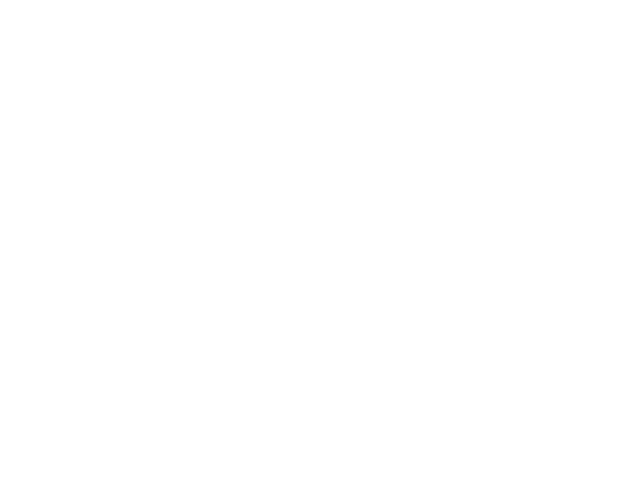

The label is H


<IPython.core.display.Javascript object>


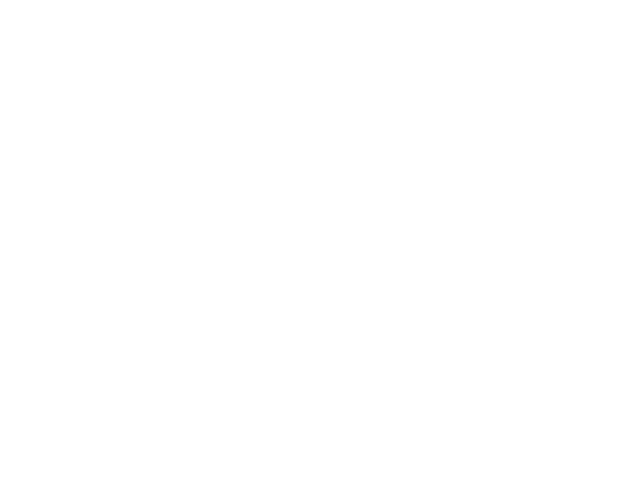

The label is L


<IPython.core.display.Javascript object>


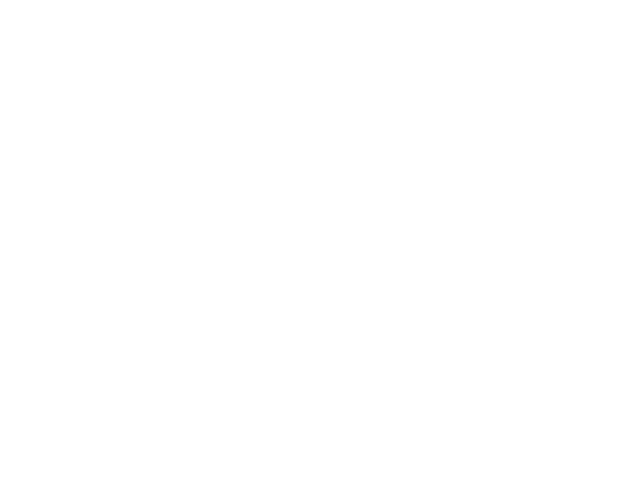

The label is C


<IPython.core.display.Javascript object>


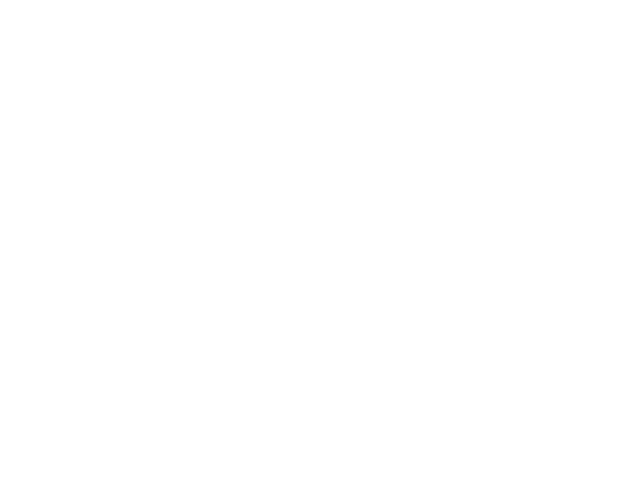

The label is R


<IPython.core.display.Javascript object>


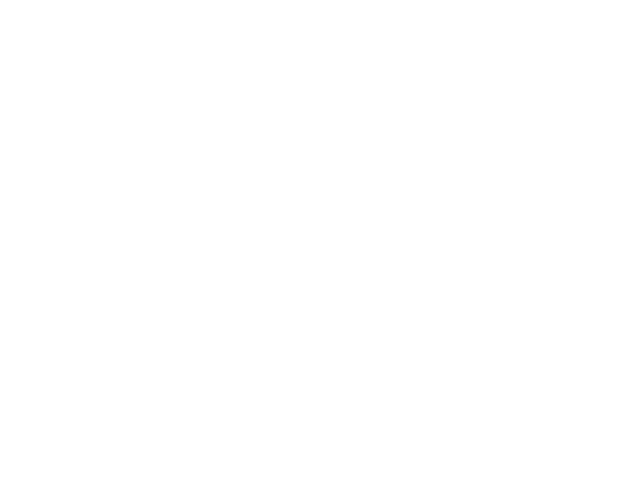

The label is unknown


<IPython.core.display.Javascript object>


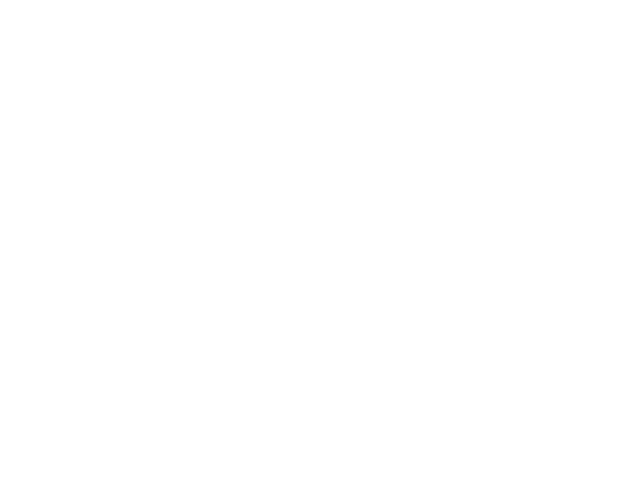

The label is K


<IPython.core.display.Javascript object>


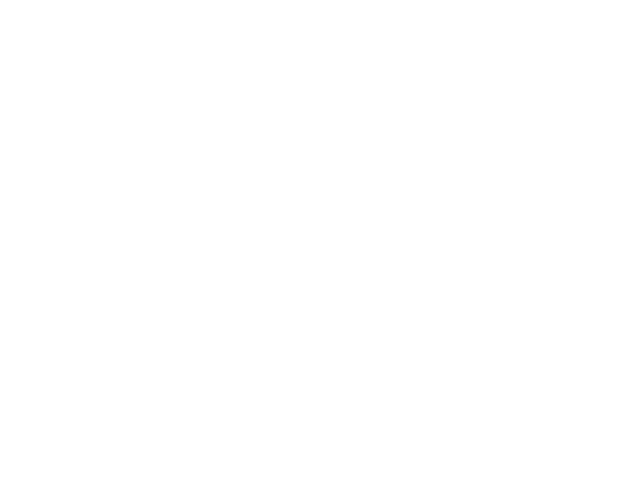

The label is D
Too less sample for clustering
The label is E


<IPython.core.display.Javascript object>


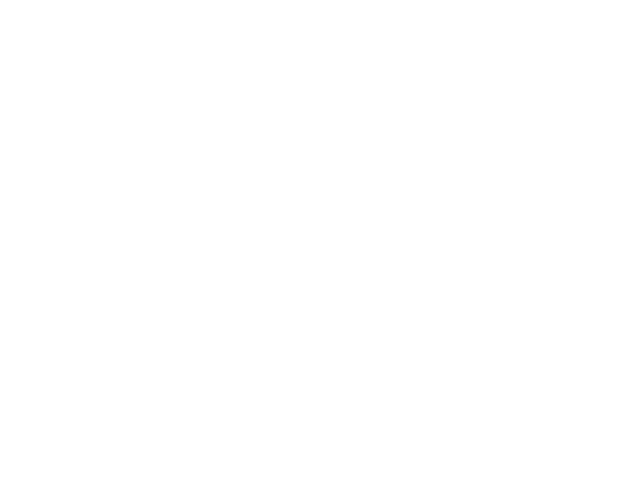

The label is S


<IPython.core.display.Javascript object>


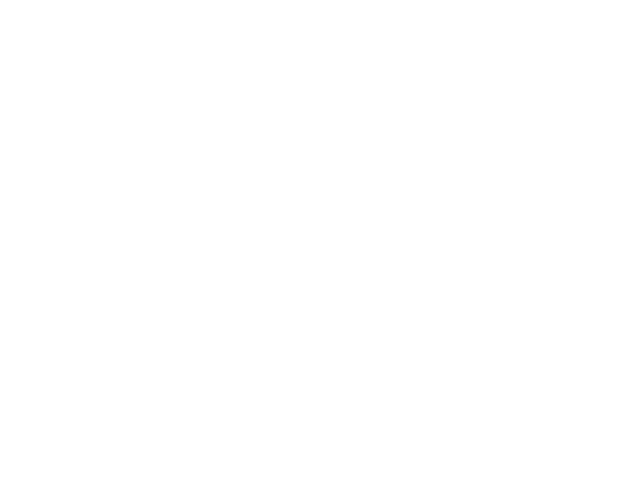

The label is J


<IPython.core.display.Javascript object>


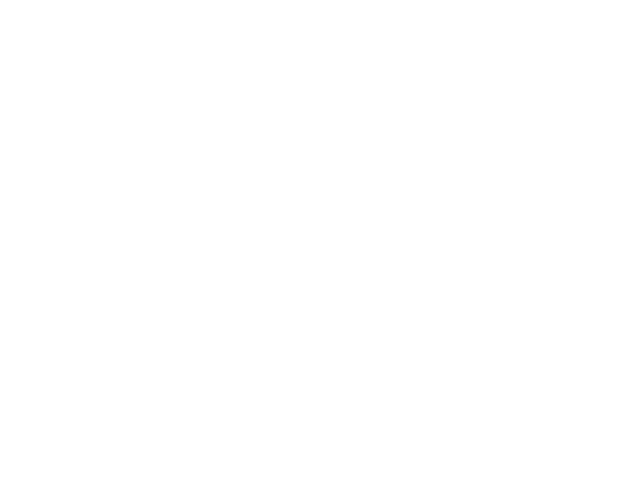

The label is F


<IPython.core.display.Javascript object>


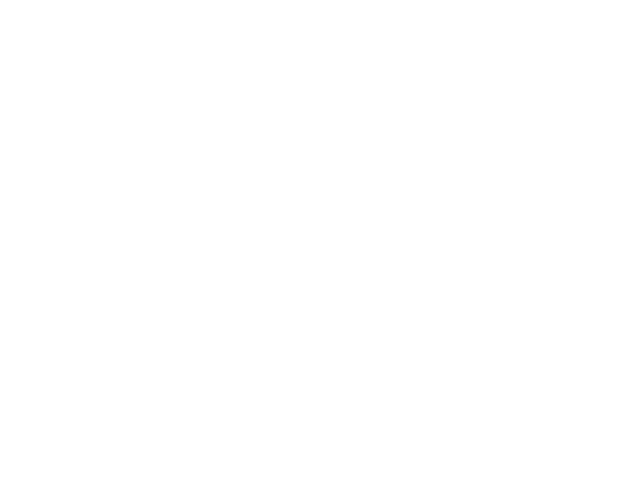

The label is p


<IPython.core.display.Javascript object>


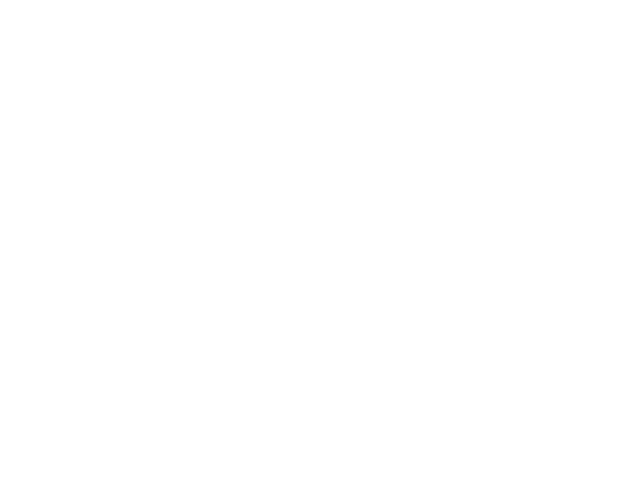

In [20]:
%matplotlib notebook
labels = df['Labels'].unique().tolist()
for element in labels:
    print("The label is", element)
    part = df[df['Labels']==element].drop(["Labels"], axis=1)
    if (part.shape[0] < 10):
        print("Too less sample for clustering")
    #print(part.head())
    else:
        sd = StandardScaler()
        sd1 = RobustScaler()
        part = sd.fit_transform(part)
        part = sd1.fit_transform(part)
        part = pd.DataFrame(part)
        part.columns = ['new_profit','new_income', 'coeff']
        clusters2 = AgglomerativeClustering(n_clusters=3).fit_predict(part)
                     # to work in 3d

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        x = part["coeff"]
        y = part["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
        z = part["new_income"] # mean of the daily income / total number of days
        ax.scatter(x, y, z, c=clusters2, marker='o')

        ax.set_xlabel('coeff')
        ax.set_ylabel('daily_profit')
        ax.set_zlabel('daily_revenue')

        plt.show()

The label is M


<IPython.core.display.Javascript object>


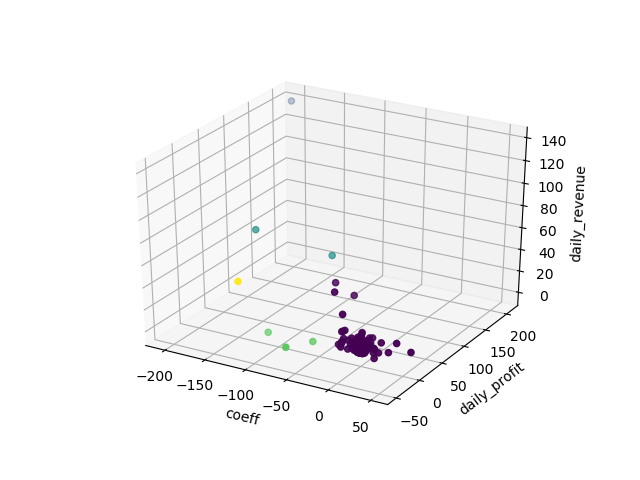

The label is G


<IPython.core.display.Javascript object>


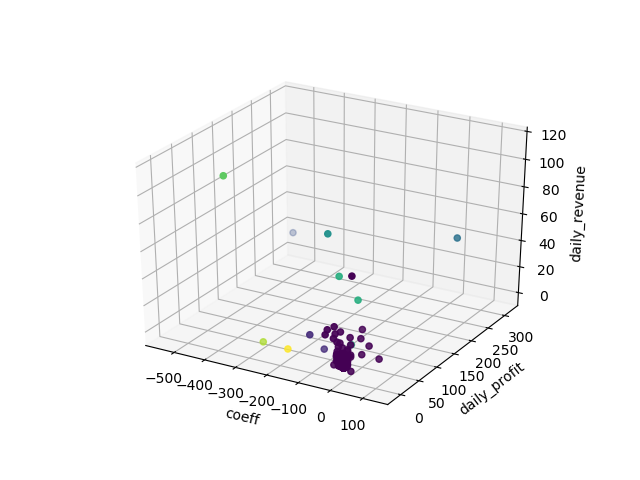

The label is Q


<IPython.core.display.Javascript object>


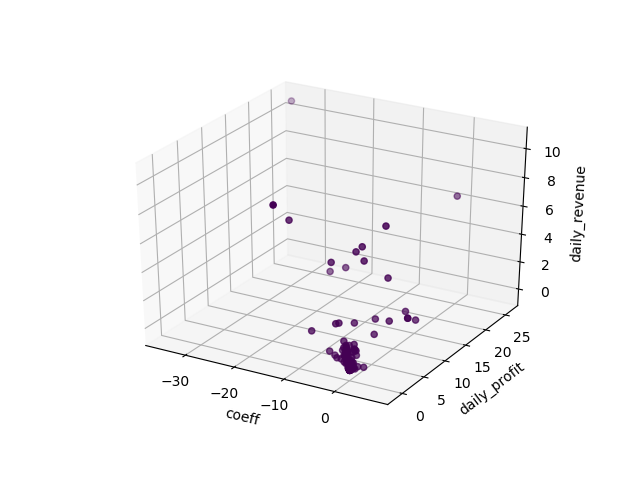

The label is I


<IPython.core.display.Javascript object>


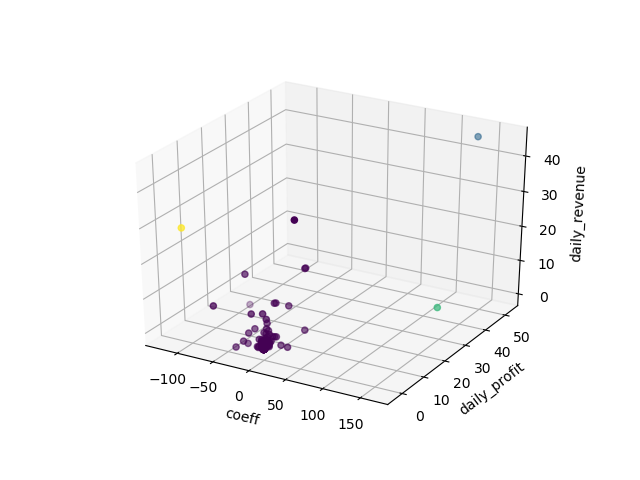

The label is A


<IPython.core.display.Javascript object>


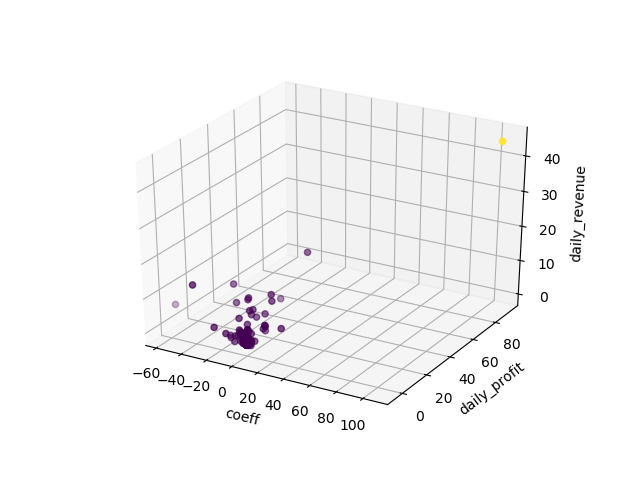

The label is H


<IPython.core.display.Javascript object>


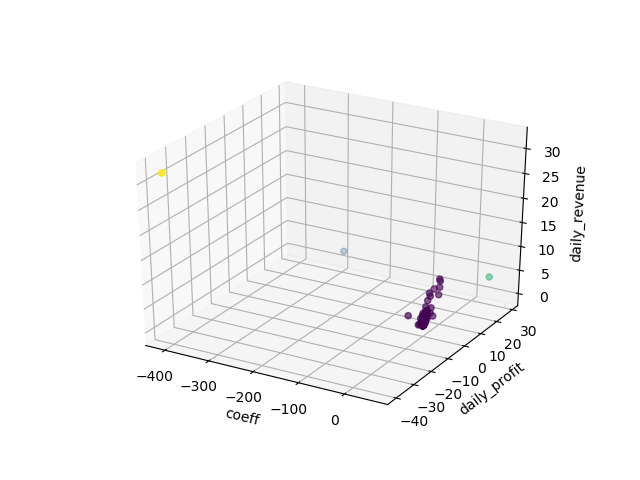

The label is L


<IPython.core.display.Javascript object>


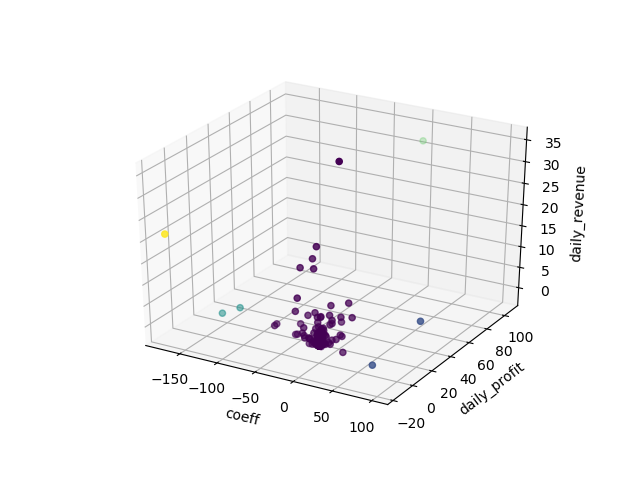

The label is C


<IPython.core.display.Javascript object>


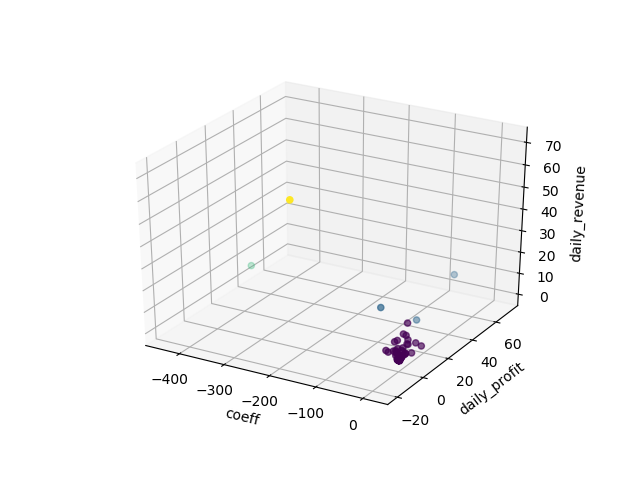

The label is R


<IPython.core.display.Javascript object>


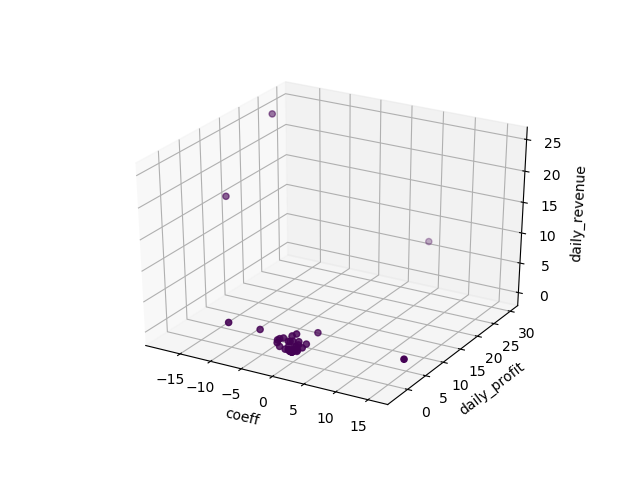

The label is unknown


<IPython.core.display.Javascript object>


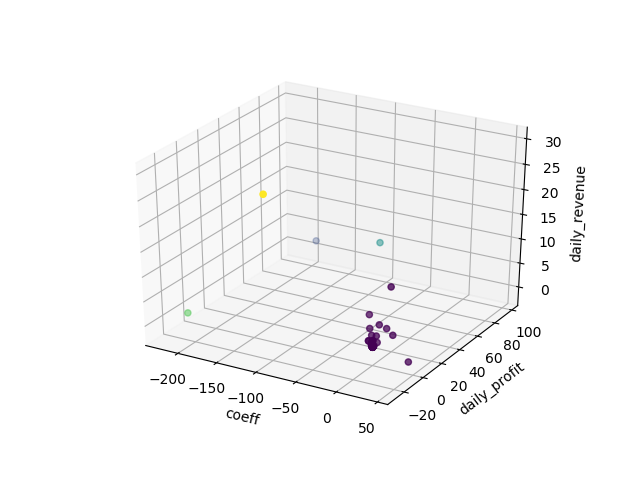

The label is K


<IPython.core.display.Javascript object>


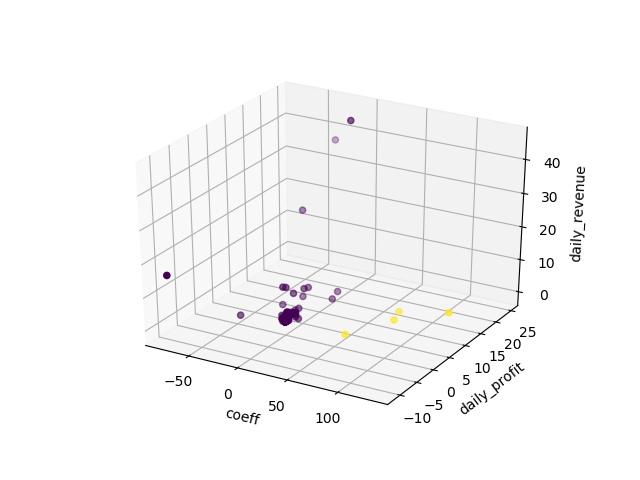

The label is D
Too less sample for clustering
The label is E


<IPython.core.display.Javascript object>


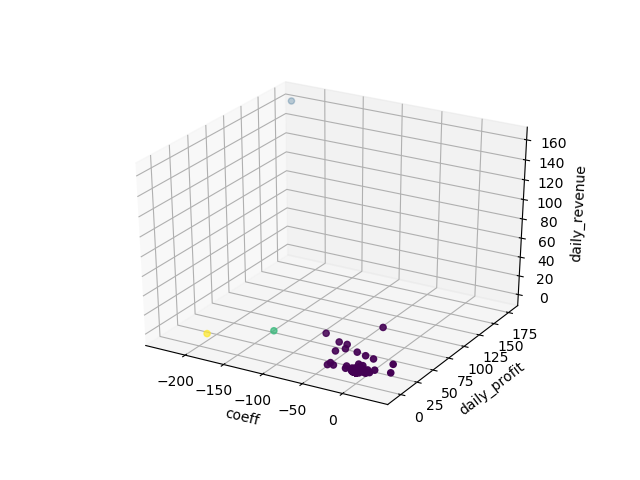

The label is S


<IPython.core.display.Javascript object>


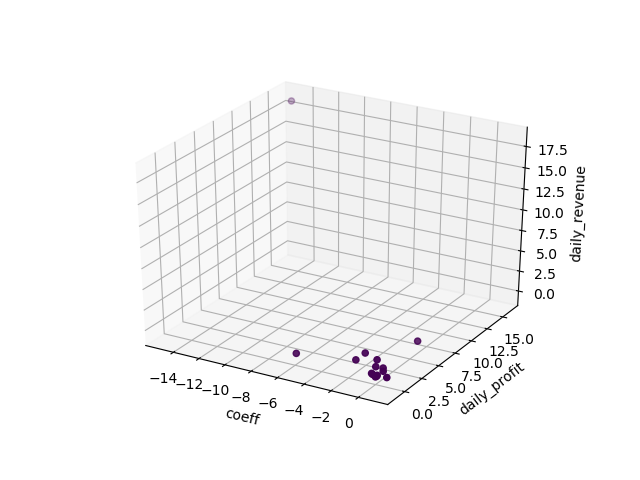

The label is J


<IPython.core.display.Javascript object>


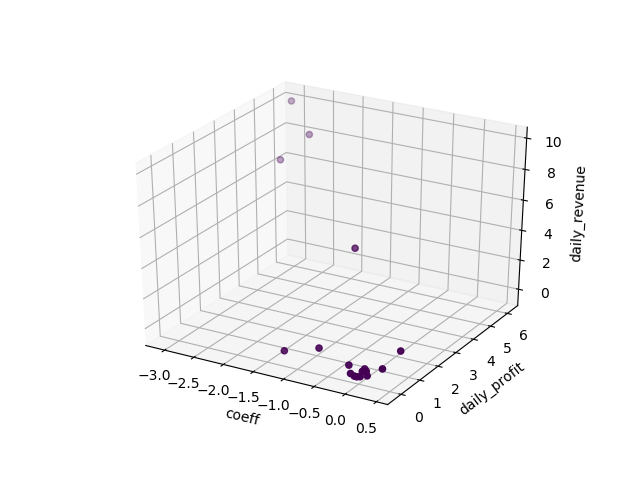

The label is F


<IPython.core.display.Javascript object>


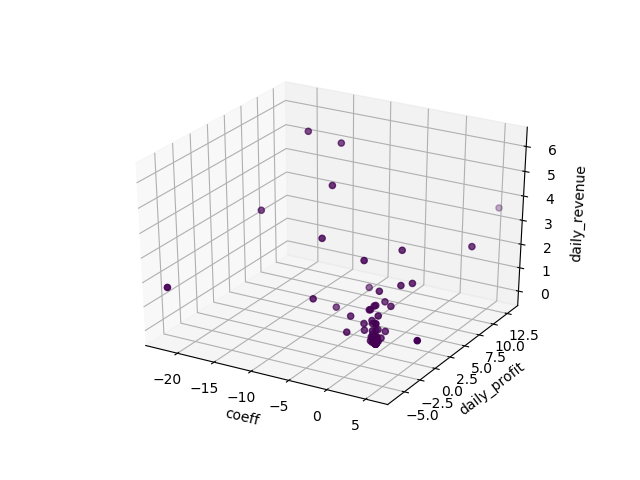

The label is p


<IPython.core.display.Javascript object>


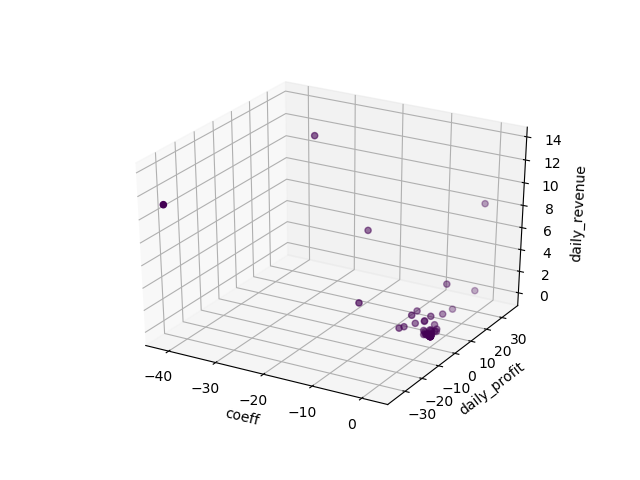

In [21]:
%matplotlib notebook
labels = df['Labels'].unique().tolist()
for element in labels:
    print("The label is", element)
    part = df[df['Labels']==element].drop(["Labels"], axis=1)
    if (part.shape[0] < 10):
        print("Too less sample for clustering")
    #print(part.head())
    else:
        sd = StandardScaler()
        sd1 = RobustScaler()
        part = sd.fit_transform(part)
        part = sd1.fit_transform(part)
        part = pd.DataFrame(part)
        part.columns = ['new_profit','new_income', 'coeff']
        clusters2 = MeanShift(bandwidth=50).fit_predict(part)
                     # to work in 3d

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        x = part["coeff"]
        y = part["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
        z = part["new_income"] # mean of the daily revenue records
        ax.scatter(x, y, z, c=clusters2, marker='o')

        ax.set_xlabel('coeff')
        ax.set_ylabel('daily_profit')
        ax.set_zlabel('daily_revenue')

        plt.show()